# Verspieren - Exploration des données 

## Exporation y_pred

In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import PIL.Image
import numpy as np
import tensorflow.keras as tf 
from PIL import ImageFilter

In [2]:
y_pred = pd.read_csv("../raw_data/central_pixel_benchmark.csv")

In [5]:
y_pred.set_index('GalaxyID')

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
GalaxyID,,,,,,,,,,,,,,,,,,,,,
100018,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,0.019015,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
100037,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,0.019015,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
100042,0.408863,0.550817,0.040320,0.085001,0.465816,0.117082,0.348734,0.225783,0.240033,0.184419,...,0.054510,0.068422,0.087200,0.070161,0.028580,0.094907,0.017221,0.007030,0.004902,0
100052,0.322002,0.657280,0.020718,0.136922,0.520358,0.121784,0.398573,0.310370,0.209988,0.071409,...,0.058241,0.128488,0.123550,0.058332,0.021707,0.140455,0.028082,0.011659,0.008495,0
100056,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,0.019015,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999955,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,0.019015,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
999981,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,0.019015,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
999990,0.408863,0.550817,0.040320,0.085001,0.465816,0.117082,0.348734,0.225783,0.240033,0.184419,...,0.054510,0.068422,0.087200,0.070161,0.028580,0.094907,0.017221,0.007030,0.004902,0


## Creation dataframe avec colonne "path" 

In [6]:
def path_generator(GalaxyId):
    path = f"../raw_data/images_test_rev1/{GalaxyId}.jpg"
    return path

In [12]:
X['GalaxyID'] = y_pred['GalaxyID']

In [29]:
X['path'] = X['GalaxyID'].apply(path_generator)

In [32]:
X = X.set_index('GalaxyID')

In [33]:
X

,path
GalaxyID,
100018,../raw_data/images_test_rev1/100018.jpg
100037,../raw_data/images_test_rev1/100037.jpg
100042,../raw_data/images_test_rev1/100042.jpg
100052,../raw_data/images_test_rev1/100052.jpg
100056,../raw_data/images_test_rev1/100056.jpg
...,...
999955,../raw_data/images_test_rev1/999955.jpg
999981,../raw_data/images_test_rev1/999981.jpg
999990,../raw_data/images_test_rev1/999990.jpg


## Merging X & y

In [41]:
dataframe = X.merge(y_pred, left_on='GalaxyID', right_on='GalaxyID')

In [43]:
dataframe = dataframe.set_index('GalaxyID')

In [44]:
dataframe.head()

,path,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
GalaxyID,,,,,,,,,,,,,,,,,,,,,
100018,../raw_data/images_test_rev1/100018.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
100037,../raw_data/images_test_rev1/100037.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
100042,../raw_data/images_test_rev1/100042.jpg,0.408863,0.550817,0.040320,0.085001,0.465816,0.117082,0.348734,0.225783,0.240033,...,0.054510,0.068422,0.087200,0.070161,0.028580,0.094907,0.017221,0.007030,0.004902,0
100052,../raw_data/images_test_rev1/100052.jpg,0.322002,0.657280,0.020718,0.136922,0.520358,0.121784,0.398573,0.310370,0.209988,...,0.058241,0.128488,0.123550,0.058332,0.021707,0.140455,0.028082,0.011659,0.008495,0
100056,../raw_data/images_test_rev1/100056.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0


## Sampling 5000 rows

In [36]:
def sampling (df,nrows):
    X_sampled = df.sample(nrows)
    return X_sampled

In [45]:
sampling(dataframe,5000)

,path,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
GalaxyID,,,,,,,,,,,,,,,,,,,,,
681398,../raw_data/images_test_rev1/681398.jpg,0.322002,0.657280,0.020718,0.136922,0.520358,0.121784,0.398573,0.31037,0.209988,...,0.058241,0.128488,0.123550,0.058332,0.021707,0.140455,0.028082,0.011659,0.008495,0
971356,../raw_data/images_test_rev1/971356.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.18508,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
572397,../raw_data/images_test_rev1/572397.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.18508,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
711832,../raw_data/images_test_rev1/711832.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.18508,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
717850,../raw_data/images_test_rev1/717850.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.18508,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265925,../raw_data/images_test_rev1/265925.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.18508,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
171957,../raw_data/images_test_rev1/171957.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.18508,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
441096,../raw_data/images_test_rev1/441096.jpg,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.18508,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0


## Ouverture images from paths

In [58]:
def open_im(path):
    image = PIL.Image.open(path)
    return image
    

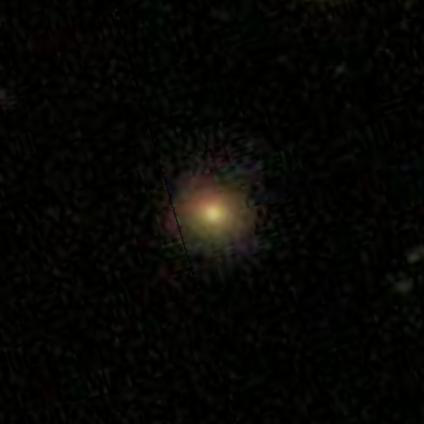

In [60]:
open_im('../raw_data/images_test_rev1/572397.jpg')

In [69]:
image.

'JPEG'

In [73]:
im1 = image.filter(ImageFilter.BLUR)

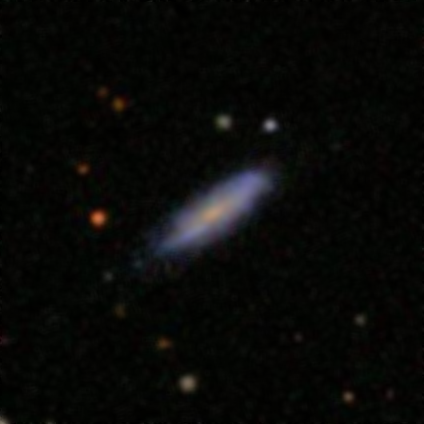

In [74]:
im1